# Подбор коров при помощи моделей машинного обучения

Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада, и для этого он заключил контракт с ассоциацией пастбищ «ЭкоФерма».

Нашу IT-компанию наняли помочь фермеру с подбором подходящих коров, используя модели машинного обучения. Главные критерии фермера - коровы должны давать не менее 6000 килограммов молока в год, а надой был вкусным - строго по его критериям.

Перед нами стоят задачи разработать 2 прогнозные модели:
- Первая будет прогнозировать возможный удой коровы (Целевой признак `Удой`)
- Вторая будет рассчитывать вероятность получить вкусное молоко от коровы (Целевой признак `Вкус молока`)

На основе прогнозов этих двух моделей будут приниматься решения о покупке той или иной коровы.

**Описание данных**

1. `ferma_main.csv` содержит данные о стаде фермера на текущий момент.
 - id — уникальный идентификатор коровы.
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Жирность,% — содержание жиров в молоке (в процентах).
 - Белок,% — содержание белков в молоке (в процентах).
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


2. `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. 
 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.


3. `cow_buy.csv` это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Имя_папы — имя папы коровы.
 - Текущая_жирность,% — содержание жиров в молоке (в процентах).
 - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## Загрузка данных

In [182]:
def dataset_info(ds, info=True): # Универсальная функция презентации данных
    print('Количество дубликатов:', ds.duplicated().sum())
    print('Длина датасета:', len(ds))
    display(ds.head())
    if info: 
        ds.info()
        display(ds.describe())

Для начала загрузим и ознакомимся со всеми данными.

In [183]:
try:  # Загрузка датасета с информацией о текущем стаде фермера
    ds_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    ds_main = pd.read_csv('datasets/ferma_main.csv', sep=';')
dataset_info(ds_main)

Количество дубликатов: 5
Длина датасета: 634


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


In [184]:
try:  # Загрузка датасета с информацией об отце каждой коровы в стаде фермера
    ds_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ds_dad = pd.read_csv('datasets/ferma_dad.csv', sep=';')
dataset_info(ds_dad, False)
ds_dad.info()

Количество дубликатов: 0
Длина датасета: 629


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [185]:
try: # Загрузка датасета с коровами, которых фермер хочет купить
    ds_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    ds_buy = pd.read_csv('datasets/cow_buy.csv', sep=';')
dataset_info(ds_buy)

Количество дубликатов: 4
Длина датасета: 20


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,73","3,074",более_2_лет
freq,11,11,12,8,3,5,15


Сразу переименуем все столбцы в более удобный для использования формат

In [186]:
ds_main.columns = ['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'пастбище', 'порода_пб', 'жирность', 'белок', 'вкус', 'возраст']
ds_main.columns # Переименование столбцов. Вручную приводим к нижнему регистру и упрощаем названия для быстрого доступа при работе с данными

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'пастбище',
       'порода_пб', 'жирность', 'белок', 'вкус', 'возраст'],
      dtype='object')

In [187]:
ds_dad.columns = ['id', 'имя_папы']
ds_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [188]:
ds_buy.columns = ['порода', 'пастбище', 'порода_пб', 'имя_папы', 'жирность', 'белок', 'возраст']
ds_buy.columns

Index(['порода', 'пастбище', 'порода_пб', 'имя_папы', 'жирность', 'белок',
       'возраст'],
      dtype='object')

Пропусков нигде нет, зато есть несколько полных дубликатов в данных, а также неверно определены некоторые численные переменные. Разберёмся со всем этим на этапе предобработки.

##  Предобработка данных

Начнём с дубликатов. Датасет `ds_main` содержит в себе 5 полных дубликатов (Включая уникальный id), их можно сразу удалить.

In [189]:
ds_main = ds_main.drop_duplicates() # Сброс полных дубликатов и проверка
ds_main.duplicated().sum()

0

Теперь мы можем совместить датасеты `ds_main` и `ds_dad`, чтобы не работать с большим количеством маленьких датасетов

In [190]:
ds_main = ds_main.merge(ds_dad, on='id') # Объединение ds_main и ds_dad по id
dataset_info(ds_main, False)

Количество дубликатов: 0
Длина датасета: 629


,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет,Буйный
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет,Соловчик
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет,Барин
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет,Буйный
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет,Барин


На дубликаты датасета `ds_buy` лучше посмотрим поближе. В нём гораздо меньше записей, а также отсутствует уникальный идентификатор. Не хотелось-бы избавляться от коров, которые просто очень похожи друг на друга.

In [191]:
ds_buy[ds_buy.duplicated(keep=False)] # Вывод всех дублирующихся записей

,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Совпадение в породе, типе пастбища и имени папы ещё можно счесть за совпадение, но идентичная жирность и содержание белка в молоке уже можно назвать закономерностью. Тем не менее, эти данные не будут использоваться при обучении модели, а лишние 4 предсказания модель не сломают. Оставим дубликаты исключительно на случай, если это в действительности удивительное совпадение.

Теперь типы данных. Некоторые числовые сведения в обоих датасетах сохранились в виде строк. Преобразуем их в числовой тип.

In [192]:
for i in ['жирность', 'белок', 'эке', 'спо']: # Для каждого столбца из списка, все запятые меняются на точки, строки переводятся в числовой тип данных
    ds_main[i] = pd.to_numeric(ds_main[i].replace(',', '.', regex=True))
dataset_info(ds_main)

Количество дубликатов: 0
Длина датасета: 629


,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         629 non-null    int64  
 1   удой       629 non-null    int64  
 2   эке        629 non-null    float64
 3   протеин    629 non-null    int64  
 4   спо        629 non-null    float64
 5   порода     629 non-null    object 
 6   пастбище   629 non-null    object 
 7   порода_пб  629 non-null    object 
 8   жирность   629 non-null    float64
 9   белок      629 non-null    float64
 10  вкус       629 non-null    object 
 11  возраст    629 non-null    object 
 12  имя_папы   629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


,id,удой,эке,протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [193]:
for i in ['жирность', 'белок']: # Для каждого столбца из списка, все запятые меняются на точки, строки переводятся в числовой тип данных
    ds_buy[i] = pd.to_numeric(ds_buy[i].replace(',', '.', regex=True))
dataset_info(ds_buy)

Количество дубликатов: 4
Длина датасета: 20


,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   порода     20 non-null     object 
 1   пастбище   20 non-null     object 
 2   порода_пб  20 non-null     object 
 3   имя_папы   20 non-null     object 
 4   жирность   20 non-null     float64
 5   белок      20 non-null     float64
 6   возраст    20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,жирность,белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Теперь все типы данных в порядке, пропусков нет, опасные дубликаты удалены. На этом предобработку данных можно заканчивать.

## Исследовательский анализ данных

Для начала разделим все столбцы датасета с текущим стадом на строковые и числовые. Так будет проще создавать правильные графики для каждого столбца.

In [194]:
ds_main_numeric = [] # Список названий столбцов с числовыми данными
ds_main_string = [] # Список названий столбцов со строковыми данными
for i in ds_main.columns:
    if ds_main[i].dtype == 'O':
        ds_main_string.append(i)
    elif i != 'id':
        ds_main_numeric.append(i)
print(ds_main_string, ds_main_numeric)

['порода', 'пастбище', 'порода_пб', 'вкус', 'возраст', 'имя_папы'] ['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']


Теперь построим гистограммы для всех числовых столбцов.

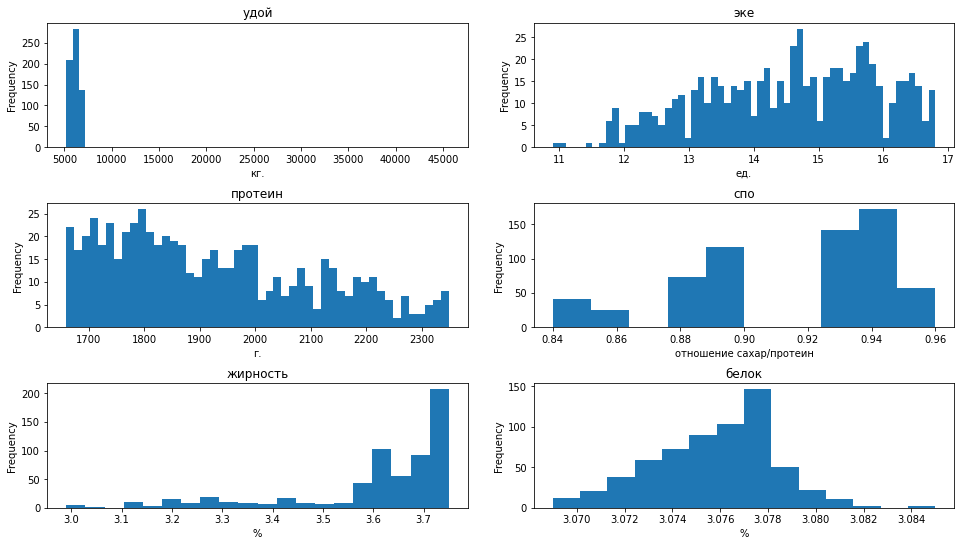

In [195]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
fig.tight_layout(pad=3.5)
bins_list = [60, 58, 48, 10, 20, 14]
label_list = ['кг.', 'ед.', 'г.', 'отношение сахар/протеин', '%', '%']
for i in range(len(ds_main_numeric)):
    ds_main[ds_main_numeric[i]].plot(kind='hist', ax=axes[i//2, i%2], title=ds_main_numeric[i], bins=bins_list[i])
    axes[i//2, i%2].set_xlabel(label_list[i])

45 тысяч килограмм удоя в год выглядят не слишком-то реалистично. Выведем все записи со значением удоя выше 10000.

In [196]:
ds_main[ds_main['удой']>10000]

,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет,Буйный


Наверняка эта корова мировой рекордсмен, обеспечивающая только своим удоем небольшой город. Либо это простая ошибка в данных. В любом случае, в рамках обучения модели она нам будет мешать. Попрощаемся с чемпионом и продолжим двигаться дальше.

In [197]:
ds_main = ds_main[ds_main['удой']<10000]
ds_main[ds_main['id'] == 17]

,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы


Теперь можем посмотреть на распределение аномальных значений при помощи диаграммы размаха.

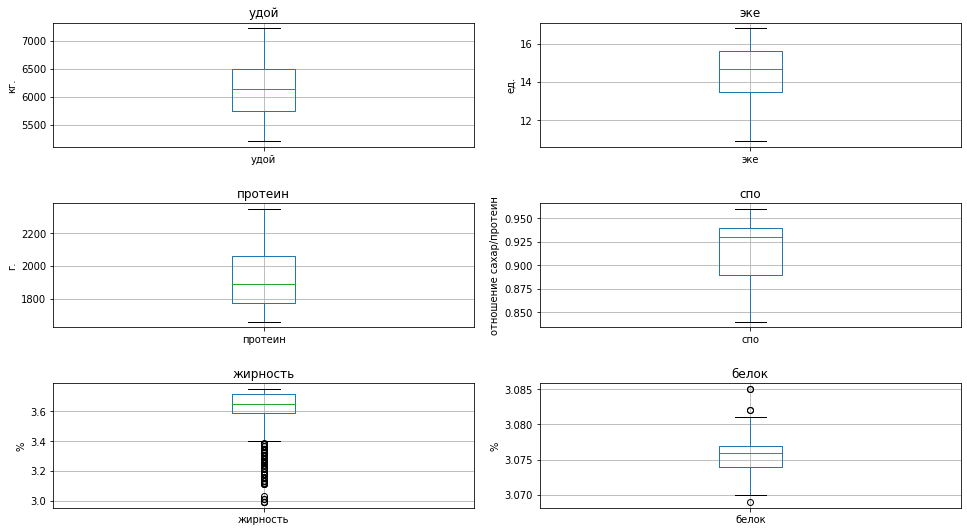

In [198]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
fig.tight_layout(pad=3.5)
label_list = ['кг.', 'ед.', 'г.', 'отношение сахар/протеин', '%', '%']
for i in range(len(ds_main_numeric)):
    ds_main[ds_main_numeric[i]].plot(kind='box', ax=axes[i//2, i%2], title=ds_main_numeric[i], grid=True)
    axes[i//2, i%2].set_ylabel(label_list[i])

Крайне редкие аномальные значения с обеих сторон от медианы у белка, и огромное количество аномально низких значений жирности молока. Однако они не настолько сильно выбиваются из общего списка значений, поэтому оставим аномалии нетронутыми. Все остальные показатели полностью лишены аномальных значений. 

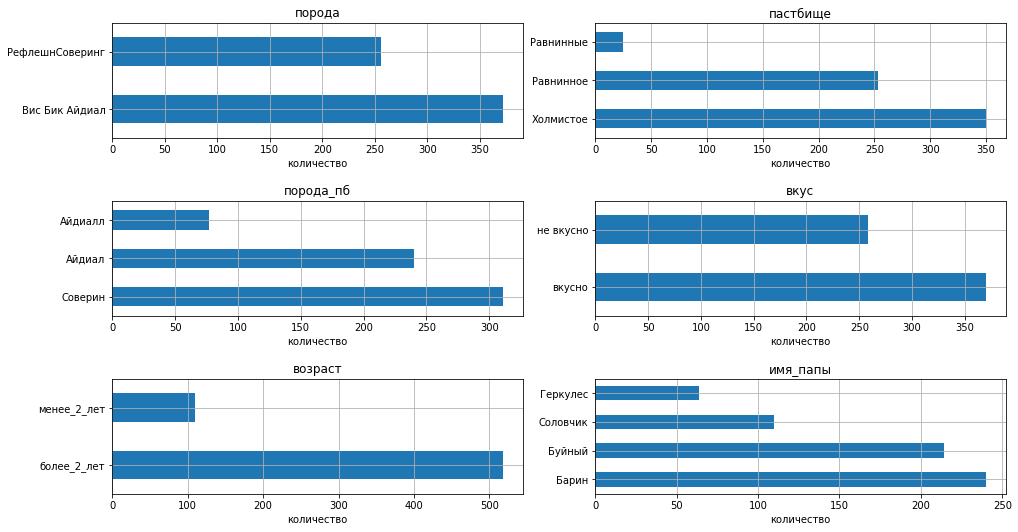

In [199]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
fig.tight_layout(pad=4.2)
for i in range(len(ds_main_string)):
    ds_main[ds_main_string[i]].value_counts().plot(kind='barh', ax=axes[i//2, i%2], title=ds_main_string[i], grid=True)
    axes[i//2, i%2].set_xlabel('количество')

Видны неявные дубликаты у типа пастбищ и породы папы-быка - Равнинные и равнинное, Айдиалл и Айдиал. Заменим всё на более популярные значения.

In [200]:
ds_main.loc[ds_main['пастбище'] == 'Равнинные', 'пастбище'] = 'Равнинное'
ds_main['пастбище'].value_counts()

Холмистое    350
Равнинное    278
Name: пастбище, dtype: int64

In [201]:
ds_main.loc[ds_main['порода_пб'] == 'Айдиалл', 'порода_пб'] = 'Айдиал'
ds_main['порода_пб'].value_counts()

Айдиал     317
Соверин    311
Name: порода_пб, dtype: int64

## Корреляционный анализ

## Обучение модели линейной регрессии

## Обучение модели логистической регрессии

## Итоговые выводы